步骤一：读入train和test

In [4]:
import os
import pandas as pd
os.chdir("F:\\项目\\阿里妈妈")   #修改当前工作目录
os.getcwd()    #获取当前工作目录

'F:\\项目\\阿里妈妈'

In [11]:
data_train = pd.read_table('round1_ijcai_18_train_20180301.txt',header=0,encoding='gb2312',delim_whitespace=True)
data_test=pd.read_table('round1_ijcai_18_test_a_20180301.txt',header=0,encoding='gb2312',delim_whitespace=True)
print(data_train.shape)
print(data_test.shape)

(478138, 27)
(18371, 26)


步骤二：train和test整理的EDA

In [27]:
data_train.describe()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,context_timestamp,context_page_id,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
count,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,478138.000000,478138.00000,478138.000000,478138.000000,4.781380e+05,478138.000000,...,4.781380e+05,478138.000000,4.781380e+05,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000
mean,4.613082e+18,4.594622e+18,4.838444e+18,5.500420e+18,6.777175,11.13384,12.199336,17.128676,4.609864e+18,0.213047,...,1.537502e+09,4003.362366,4.733842e+18,15.768353,0.994830,5013.175240,0.971124,0.970497,0.974863,0.018867
std,2.663448e+18,2.710140e+18,2.694756e+18,2.464881e+18,1.089037,2.58886,2.497312,2.160745,2.663355e+18,0.514699,...,1.726222e+05,4.019709,2.596118e+18,2.825294,0.011972,2.590989,0.023817,0.023776,0.025024,0.136055
min,3.823219e+12,6.964907e+14,-1.000000e+00,-1.000000e+00,0.000000,-1.00000,0.000000,0.000000,2.477979e+13,-1.000000,...,1.537200e+09,4001.000000,1.543560e+15,0.000000,-1.000000,4999.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.308543e+18,2.251088e+18,2.357806e+18,3.948283e+18,6.000000,10.00000,11.000000,16.000000,2.302761e+18,0.000000,...,1.537351e+09,4001.000000,2.498543e+18,14.000000,0.992779,5012.000000,0.966360,0.965684,0.969268,0.000000
50%,4.613478e+18,4.636270e+18,5.051040e+18,6.738284e+18,7.000000,11.00000,12.000000,17.000000,4.608490e+18,0.000000,...,1.537506e+09,4001.000000,4.629590e+18,16.000000,1.000000,5013.000000,0.972347,0.971590,0.978493,0.000000
75%,6.920994e+18,7.007158e+18,7.565625e+18,7.534239e+18,8.000000,13.00000,14.000000,19.000000,6.914375e+18,0.000000,...,1.537635e+09,4004.000000,6.740687e+18,17.000000,1.000000,5015.000000,0.977822,0.976978,0.983640,0.000000
max,9.223362e+18,9.221980e+18,9.222396e+18,9.151271e+18,17.000000,17.00000,17.000000,21.000000,9.223345e+18,2.000000,...,1.537805e+09,4020.000000,9.220773e+18,25.000000,1.000000,5020.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data_test.describe()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,context_id,context_timestamp,context_page_id,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description
count,1.837100e+04,1.837100e+04,1.837100e+04,1.837100e+04,18371.000000,18371.000000,18371.000000,18371.000000,1.837100e+04,18371.000000,...,1.837100e+04,1.837100e+04,18371.000000,1.837100e+04,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000,18371.000000
mean,4.607419e+18,4.582686e+18,4.845199e+18,5.557806e+18,6.837951,11.109194,12.228621,17.035382,4.594443e+18,0.220946,...,4.642666e+18,1.537862e+09,4003.377171,4.717927e+18,15.816123,0.994915,5013.228948,0.971321,0.970459,0.975041
std,2.674410e+18,2.700034e+18,2.707568e+18,2.444534e+18,1.046772,2.666971,2.549283,2.237930,2.665790e+18,0.516688,...,2.661417e+18,1.937280e+04,4.022065,2.604679e+18,2.879969,0.008981,2.646194,0.017264,0.017252,0.018832
min,1.772728e+14,1.097631e+15,-1.000000e+00,-1.000000e+00,1.000000,-1.000000,0.000000,0.000000,1.794514e+14,-1.000000,...,1.120952e+13,1.537805e+09,4001.000000,1.205713e+16,1.000000,0.870588,5000.000000,-1.000000,-1.000000,-1.000000
25%,2.287309e+18,2.251088e+18,2.351872e+18,3.948283e+18,6.000000,10.000000,11.000000,16.000000,2.300070e+18,0.000000,...,2.369361e+18,1.537848e+09,4001.000000,2.527080e+18,14.000000,0.992824,5012.000000,0.966399,0.965516,0.969490
50%,4.627598e+18,4.668472e+18,5.051040e+18,7.322157e+18,7.000000,11.000000,13.000000,17.000000,4.566476e+18,0.000000,...,4.655476e+18,1.537863e+09,4001.000000,4.598382e+18,16.000000,1.000000,5013.000000,0.972481,0.971511,0.978514
75%,6.928380e+18,7.002632e+18,7.555983e+18,7.534239e+18,8.000000,13.000000,14.000000,19.000000,6.893871e+18,0.000000,...,6.932690e+18,1.537878e+09,4004.000000,6.740687e+18,18.000000,1.000000,5015.000000,0.977937,0.976823,0.983543
max,9.222350e+18,9.221980e+18,9.222396e+18,9.151271e+18,10.000000,17.000000,17.000000,21.000000,9.222798e+18,2.000000,...,9.223243e+18,1.537891e+09,4020.000000,9.220773e+18,23.000000,1.000000,5020.000000,1.000000,1.000000,1.000000


In [31]:
data_train.count()

instance_id                  478138
item_id                      478138
item_category_list           478138
item_property_list           478138
item_brand_id                478138
item_city_id                 478138
item_price_level             478138
item_sales_level             478138
item_collected_level         478138
item_pv_level                478138
user_id                      478138
user_gender_id               478138
user_age_level               478138
user_occupation_id           478138
user_star_level              478138
context_id                   478138
context_timestamp            478138
context_page_id              478138
predict_category_property    478138
shop_id                      478138
shop_review_num_level        478138
shop_review_positive_rate    478138
shop_star_level              478138
shop_score_service           478138
shop_score_delivery          478138
shop_score_description       478138
is_trade                     478138
dtype: int64

In [32]:
data_test.count()

instance_id                  18371
item_id                      18371
item_category_list           18371
item_property_list           18371
item_brand_id                18371
item_city_id                 18371
item_price_level             18371
item_sales_level             18371
item_collected_level         18371
item_pv_level                18371
user_id                      18371
user_gender_id               18371
user_age_level               18371
user_occupation_id           18371
user_star_level              18371
context_id                   18371
context_timestamp            18371
context_page_id              18371
predict_category_property    18371
shop_id                      18371
shop_review_num_level        18371
shop_review_positive_rate    18371
shop_star_level              18371
shop_score_service           18371
shop_score_delivery          18371
shop_score_description       18371
dtype: int64

##train和test都没有缺失

In [13]:
distinct_count_train=data_train.apply(lambda x: len(x.value_counts()))
distinct_count_train

instance_id                  478087
item_id                       10075
item_category_list               14
item_property_list            10908
item_brand_id                  2055
item_city_id                    128
item_price_level                 14
item_sales_level                 18
item_collected_level             18
item_pv_level                    22
user_id                      197694
user_gender_id                    4
user_age_level                    9
user_occupation_id                5
user_star_level                  12
context_id                   478111
context_timestamp            281824
context_page_id                  20
predict_category_property     78796
shop_id                        3959
shop_review_num_level            25
shop_review_positive_rate     11825
shop_star_level                  22
shop_score_service            16361
shop_score_delivery           16423
shop_score_description        16463
is_trade                          2
dtype: int64

In [15]:
distinct_count_test=data_test.apply(lambda x: len(x.value_counts()))
distinct_count_test

instance_id                  18371
item_id                       3695
item_category_list              14
item_property_list            3690
item_brand_id                 1101
item_city_id                    99
item_price_level                10
item_sales_level                18
item_collected_level            18
item_pv_level                   21
user_id                      13573
user_gender_id                   4
user_age_level                   9
user_occupation_id               5
user_star_level                 12
context_id                   18371
context_timestamp            15592
context_page_id                 20
predict_category_property     6964
shop_id                       2015
shop_review_num_level           21
shop_review_positive_rate     1302
shop_star_level                 20
shop_score_service            1963
shop_score_delivery           1961
shop_score_description        1959
dtype: int64

步骤三：样本去重：可以看到训练集中instance_id有几十条重复ID，下部分通过检验重复逻辑，进行去重

In [59]:
ins_count=data_train['instance_id'].value_counts()
print(ins_count[ins_count>1].head(5))

5479907258807096112    3
3370133319712542740    3
2535273059737073357    2
4984307821968110563    2
6031880284089240838    2
Name: instance_id, dtype: int64


In [19]:
data_train[data_train['instance_id']==5479907258807096112 ]

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
293052,5479907258807096112,2079092401639430105,7908382889764677758;7258015885215914736,5131280576272319091;2636395404473730413;462193...,5051039799137810159,3122721854741763495,6,15,17,20,...,4001,7258015885215914736:-1;7822717283490579102:821...,8953967780295706657,20,1.0,5017,0.977122,0.976133,0.982544,1
293053,5479907258807096112,2079092401639430105,7908382889764677758;7258015885215914736,5131280576272319091;2636395404473730413;462193...,5051039799137810159,3122721854741763495,6,15,17,20,...,4001,7258015885215914736:-1;7822717283490579102:821...,8953967780295706657,20,1.0,5017,0.977122,0.976133,0.982544,1
293054,5479907258807096112,2079092401639430105,7908382889764677758;7258015885215914736,5131280576272319091;2636395404473730413;462193...,5051039799137810159,3122721854741763495,6,15,17,20,...,4001,7258015885215914736:-1;7822717283490579102:821...,8953967780295706657,20,1.0,5017,0.977122,0.976133,0.982544,1


In [20]:
data_train[data_train['instance_id']==833314485724646554  ]

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
231093,833314485724646554,365202798058356244,7908382889764677758;8277336076276184272,7323906747451897092;5131280576272319091;263639...,1114275315610038623,7534238860363577544,7,15,17,20,...,4008,8277336076276184272:820214312075361939;7908382...,1091499661419284880,20,1.0,5017,0.974604,0.975824,0.984338,1
231094,833314485724646554,365202798058356244,7908382889764677758;8277336076276184272,7323906747451897092;5131280576272319091;263639...,1114275315610038623,7534238860363577544,7,15,17,20,...,4008,8277336076276184272:820214312075361939;7908382...,1091499661419284880,20,1.0,5017,0.974604,0.975824,0.984338,1


随机抽取3次重复和两次重复的样本可以看到instance_id相同的数据中其它变量相同，因此进行去重逻辑，去重后样本量为478087

In [97]:
data_train1=data_train.drop_duplicates(subset='instance_id',keep='last') 
data_train1.shape

(478087, 27)

In [46]:
import matplotlib.pyplot as plt

def cat(var,cnt):
    var_prob=data_train1.loc[:,[var,'is_trade']].groupby(var).mean()
    var_count=data_train1[var].value_counts().rename('train')
    var_count_test=data_test[var].value_counts().rename('test')
    join=pd.merge(pd.DataFrame(var_count),pd.DataFrame(var_count_test),left_index=True,right_index=True,how='outer')
    join2=pd.merge(join,var_prob,left_index=True,right_index=True,how='left')
    join2=join2.reset_index(drop=False)
    
    join2=join2.sort_values(by=['train'],ascending=0).reset_index(drop=True)
    plt.title('Train Data Distribution With Count >%0.1f'%cnt)
    plt.ylabel('Count')
    plt.xlabel('index')
    p1 = plt.bar(join2[join2['train']>cnt].index , join2[join2['train']>cnt]['train'], color='b')
    plt.show()
        
    print(' Train Data Cnt 1 per 分位数 %0.1f ' %var_count.quantile(0.01),'\n','Train Data Cnt 10 per 分位数 %0.1f'%var_count.quantile(0.10)
          ,'\n','Train Data Cnt 50 per 分位数 %0.1f'%var_count.quantile(0.50),'\n','Train Data Cnt 90 per 分位数 %0.1f'%var_count.quantile(0.90),'\n',
         'Train Data Cnt 99 per 分位数 %0.1f'%var_count.quantile(0.99))
    print(' 训练集拥有分类数%0.1f' %len(var_count),
          '检验集拥有分类数%0.1f'%len(var_count_test),
          '共有有分类数%0.1f' %len(join2),'\n',
          '训练集最多分类样本数%0.1f' %join2['train'].max(),
          '训练集最少分类样本数%0.1f' %join2['train'].min(),
          '检验集新分类数样本数%0.1f'%join2[join2['train'].isnull()]['test'].sum())

步骤四：对变量进行单独的分析，查看是否存在冷启动和分布不均匀情况等

1.instance_id 为样本编号 train中为478087条观测  test中为18371条观测 均为distinct
2.is_trade为目标变量,train中为有is_trade,购买率为1.8%test中无作为目标变量进行预测

In [40]:
data_train1['is_trade'].mean()

0.018812475553612627

3.item_id为广告商品编号 即广告分类数，可以看到近90%的分类只有小于100的样本数,并且检验集有100多类新的广告数，样本数有207占1%左右

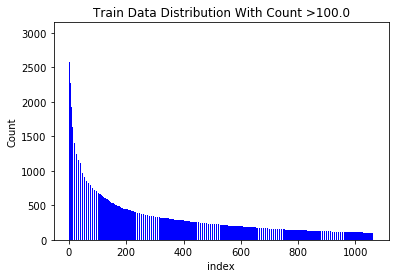

 Train Data Cnt 1 per 分位数 1.0  
 Train Data Cnt 10 per 分位数 1.0 
 Train Data Cnt 50 per 分位数 7.0 
 Train Data Cnt 90 per 分位数 108.0 
 Train Data Cnt 99 per 分位数 686.0
 训练集拥有分类数10074.0 检验集拥有分类数3695.0 共有有分类数10235.0 
 训练集最多分类样本数3000.0 训练集最少分类样本数1.0 检验集新分类数样本数207.0


In [47]:
cat('item_id',100)

4.user_id为用户编号   可以看出用户基本都为新用户，最多的用户购买近65次 ,估计不能用了

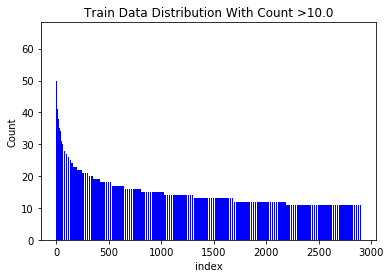

 Train Data Cnt 1 per 分位数 1.0  
 Train Data Cnt 10 per 分位数 1.0 
 Train Data Cnt 50 per 分位数 2.0 
 Train Data Cnt 90 per 分位数 5.0 
 Train Data Cnt 99 per 分位数 12.0
 训练集拥有分类数197690.0 检验集拥有分类数13573.0 共有有分类数207637.0 
 训练集最多分类样本数65.0 训练集最少分类样本数1.0 检验集新分类数样本数13198.0


In [49]:
cat('user_id',10)

5.context_id为上下文信息 为唯一编号 也可以当主键

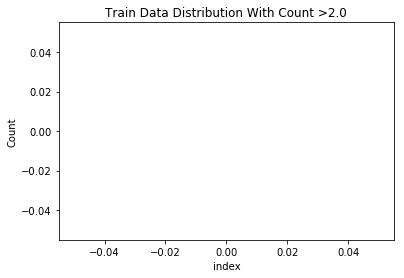

 Train Data Cnt 1 per 分位数 1.0  
 Train Data Cnt 10 per 分位数 1.0 
 Train Data Cnt 50 per 分位数 1.0 
 Train Data Cnt 90 per 分位数 1.0 
 Train Data Cnt 99 per 分位数 1.0
 训练集拥有分类数478087.0 检验集拥有分类数18371.0 共有有分类数496458.0 
 训练集最多分类样本数1.0 训练集最少分类样本数1.0 检验集新分类数样本数18371.0


In [51]:
cat('context_id',2)

6.shop_id 为店铺ID信息 有少量的新样本数，最多售卖可达到11278件，新店铺有44家，新样本数为49个 

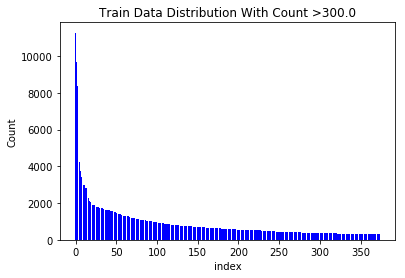

 Train Data Cnt 1 per 分位数 1.0  
 Train Data Cnt 10 per 分位数 1.0 
 Train Data Cnt 50 per 分位数 16.0 
 Train Data Cnt 90 per 分位数 283.0 
 Train Data Cnt 99 per 分位数 1606.7
 训练集拥有分类数3958.0 检验集拥有分类数2015.0 共有有分类数4002.0 
 训练集最多分类样本数11278.0 训练集最少分类样本数1.0 检验集新分类数样本数49.0


In [54]:
cat('shop_id',300) 

7.item_category_list为商品的类目列表变量，从大类到小类用;隔开，但是只有14种！！！！！应该不用再拆大类了吧

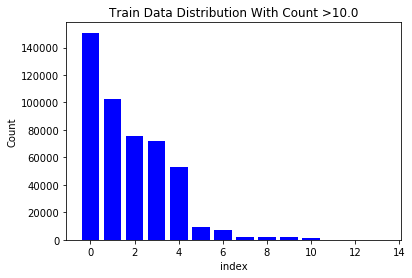

 Train Data Cnt 1 per 分位数 92.5  
 Train Data Cnt 10 per 分位数 141.9 
 Train Data Cnt 50 per 分位数 4664.5 
 Train Data Cnt 90 per 分位数 94366.1 
 Train Data Cnt 99 per 分位数 144495.1
 训练集拥有分类数14.0 检验集拥有分类数14.0 共有有分类数14.0 
 训练集最多分类样本数150772.0 训练集最少分类样本数88.0 检验集新分类数样本数0.0


In [55]:
cat('item_category_list',10) 

8.'item_property_list'为广告商品的属性列表变量便令有10000多类,并且以分号作为分隔，且没有从属关系.构建100个变量，再筛选或者GBDT衍生

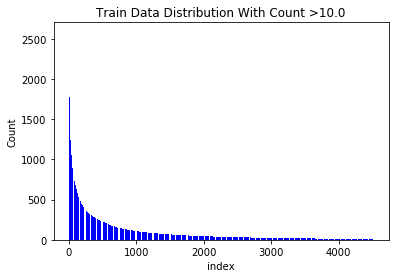

 Train Data Cnt 1 per 分位数 1.0  
 Train Data Cnt 10 per 分位数 1.0 
 Train Data Cnt 50 per 分位数 7.0 
 Train Data Cnt 90 per 分位数 98.0 
 Train Data Cnt 99 per 分位数 638.8
 训练集拥有分类数10907.0 检验集拥有分类数3690.0 共有有分类数11180.0 
 训练集最多分类样本数2578.0 训练集最少分类样本数1.0 检验集新分类数样本数575.0


In [56]:
cat('item_property_list',10) 

In [58]:
data_train['item_property_list'].head(5)

0    2072967855524022579;5131280576272319091;263639...
1    2072967855524022579;5131280576272319091;263639...
2    2072967855524022579;5131280576272319091;263639...
3    2072967855524022579;5131280576272319091;263639...
4    2072967855524022579;5131280576272319091;263639...
Name: item_property_list, dtype: object

In [87]:
item_property_cnt=data_train1['item_property_list'].map(lambda x : len(x.split(';')))
item_property_cnt.sort_values()

172991      6
23546       6
365057      7
471887      7
471888      7
97898       7
215937      7
78132       7
78131       7
354171      7
73345       7
145534      7
450667      8
450668      8
52634       8
450665      8
78208       8
149174      8
52635       8
288377      8
476227      8
52637       8
77069       8
407349      8
476228      8
288376      8
194035      8
52632       8
356874      8
331462      9
         ... 
90287     100
90286     100
90285     100
199330    100
199331    100
199332    100
199333    100
199334    100
199335    100
199336    100
199337    100
199338    100
199339    100
199340    100
199341    100
199342    100
199343    100
199344    100
199345    100
199346    100
199347    100
90278     100
90279     100
90280     100
90281     100
90282     100
90283     100
90284     100
90314     100
300065    100
Name: item_property_list, dtype: int64

该变量的属性从6-100不等，都扩展成100的形式，若没有则拿-1填充

In [99]:
item_proper=pd.DataFrame()
#为了防止报错后面拿-1填充
def split(x,i):
    try:
        y=x.split(';')[i]
    except: 
        y=0
    return y
        
for i in range(100):
    item_property_list=data_train1['item_property_list'].map(lambda x : split(x,i))
    name='item_property'+str(i)
    item_proper[name]= pd.Series(item_property_list)

In [101]:
item_proper.shape   

(478087, 100)

9.item_brand_id 广告商品的品牌编号，Long类型，共有2075个牌子，还有一个牌子有大概70000的量，新的牌子有20个

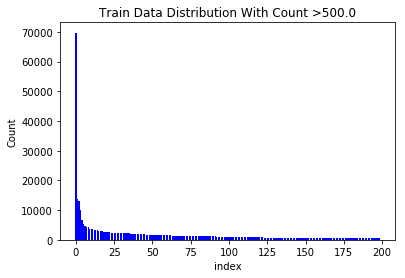

 Train Data Cnt 1 per 分位数 1.0  
 Train Data Cnt 10 per 分位数 1.0 
 Train Data Cnt 50 per 分位数 20.0 
 Train Data Cnt 90 per 分位数 479.0 
 Train Data Cnt 99 per 分位数 2622.1
 训练集拥有分类数2055.0 检验集拥有分类数1101.0 共有有分类数2075.0 
 训练集最多分类样本数69732.0 训练集最少分类样本数1.0 检验集新分类数样本数22.0


In [104]:
cat('item_brand_id',500) 

10.item_city_id 广告商品的城市编号，Long类型,共有128个城市，其中一个城市销售量很高，没有新城市

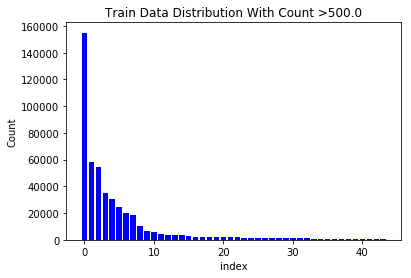

 Train Data Cnt 1 per 分位数 1.0  
 Train Data Cnt 10 per 分位数 4.0 
 Train Data Cnt 50 per 分位数 131.5 
 Train Data Cnt 90 per 分位数 3790.1 
 Train Data Cnt 99 per 分位数 57282.3
 训练集拥有分类数128.0 检验集拥有分类数99.0 共有有分类数128.0 
 训练集最多分类样本数154980.0 训练集最少分类样本数1.0 检验集新分类数样本数0.0


In [105]:
cat('item_city_id',500) 

11. item_price_level 广告商品的价格等级，Int类型；取值从0开始，数值越大表示价格越高，共有14个分类

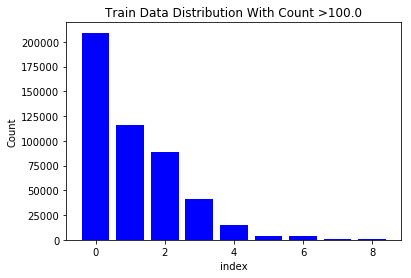

 Train Data Cnt 1 per 分位数 1.0  
 Train Data Cnt 10 per 分位数 4.3 
 Train Data Cnt 50 per 分位数 2021.5 
 Train Data Cnt 90 per 分位数 107619.9 
 Train Data Cnt 99 per 分位数 197091.3
 训练集拥有分类数14.0 检验集拥有分类数10.0 共有有分类数14.0 
 训练集最多分类样本数209271.0 训练集最少分类样本数1.0 检验集新分类数样本数0.0


In [108]:
cat('item_price_level',100) 

12.item_sales_level 广告商品的销量等级，Int类型；取值从0开始，数值越大表示销量越大 共有18个分类

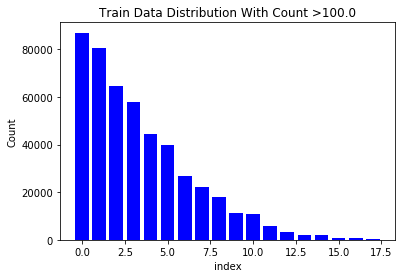

 Train Data Cnt 1 per 分位数 571.0  
 Train Data Cnt 10 per 分位数 938.9 
 Train Data Cnt 50 per 分位数 14562.0 
 Train Data Cnt 90 per 分位数 69242.4 
 Train Data Cnt 99 per 分位数 85839.8
 训练集拥有分类数18.0 检验集拥有分类数18.0 共有有分类数18.0 
 训练集最多分类样本数86947.0 训练集最少分类样本数501.0 检验集新分类数样本数0.0


In [110]:
cat('item_sales_level',100) 

13.item_collected_level 广告商品被收藏次数的等级，Int类型；取值从0开始，数值越大表示被收藏次数越大,共18个分类

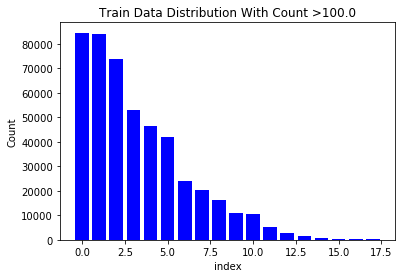

 Train Data Cnt 1 per 分位数 269.0  
 Train Data Cnt 10 per 分位数 427.4 
 Train Data Cnt 50 per 分位数 13754.5 
 Train Data Cnt 90 per 分位数 76846.4 
 Train Data Cnt 99 per 分位数 84500.8
 训练集拥有分类数18.0 检验集拥有分类数18.0 共有有分类数18.0 
 训练集最多分类样本数84595.0 训练集最少分类样本数267.0 检验集新分类数样本数0.0


In [112]:
cat('item_collected_level',100) 

14.item_pv_level 广告商品被展示次数的等级，Int类型；取值从0开始，数值越大表示被展示次数越大 共22个分类

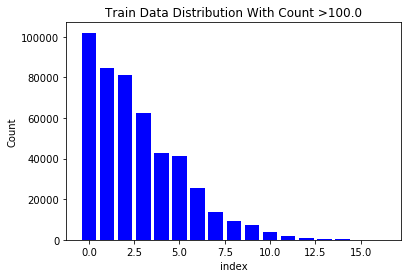

 Train Data Cnt 1 per 分位数 1.8  
 Train Data Cnt 10 per 分位数 13.2 
 Train Data Cnt 50 per 分位数 2865.0 
 Train Data Cnt 90 per 分位数 79362.8 
 Train Data Cnt 99 per 分位数 98368.2
 训练集拥有分类数22.0 检验集拥有分类数21.0 共有有分类数22.0 
 训练集最多分类样本数102072.0 训练集最少分类样本数1.0 检验集新分类数样本数0.0


In [114]:
cat('item_pv_level',100) 

15.user_gender_id   用户的预测性别编号，Int类型；0表示女性用户，1表示男性用户，2表示家庭用户，还有类是缺失吧

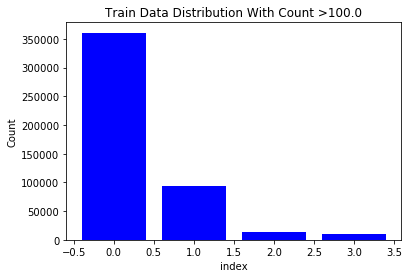

 Train Data Cnt 1 per 分位数 10425.6  
 Train Data Cnt 10 per 分位数 11114.9 
 Train Data Cnt 50 per 分位数 53480.5 
 Train Data Cnt 90 per 分位数 280761.6 
 Train Data Cnt 99 per 分位数 352775.5
 训练集拥有分类数4.0 检验集拥有分类数4.0 共有有分类数4.0 
 训练集最多分类样本数360777.0 训练集最少分类样本数10349.0 检验集新分类数样本数0.0


In [116]:
cat('user_gender_id',100) 

16.user_age_level 用户的预测年龄等级，Int类型；数值越大表示年龄越大 共9个分类

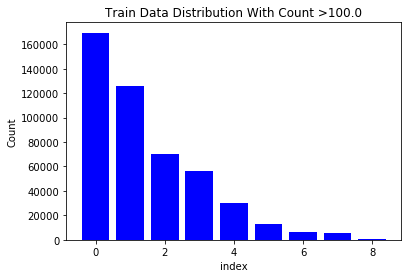

 Train Data Cnt 1 per 分位数 1304.2  
 Train Data Cnt 10 per 分位数 4365.6 
 Train Data Cnt 50 per 分位数 30186.0 
 Train Data Cnt 90 per 分位数 134777.6 
 Train Data Cnt 99 per 分位数 165966.6
 训练集拥有分类数9.0 检验集拥有分类数9.0 共有有分类数9.0 
 训练集最多分类样本数169432.0 训练集最少分类样本数964.0 检验集新分类数样本数0.0


In [118]:
cat('user_age_level',100)

17.user_occupation_id 用户的预测职业编号，Int类型，共五个分类

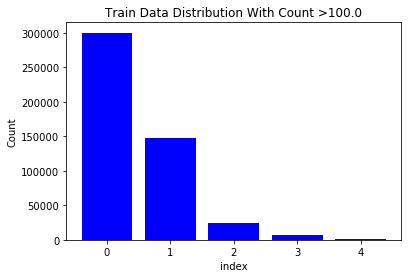

 Train Data Cnt 1 per 分位数 1182.2  
 Train Data Cnt 10 per 分位数 3145.6 
 Train Data Cnt 50 per 分位数 23802.0 
 Train Data Cnt 90 per 分位数 238760.6 
 Train Data Cnt 99 per 分位数 293873.4
 训练集拥有分类数5.0 检验集拥有分类数5.0 共有有分类数5.0 
 训练集最多分类样本数299997.0 训练集最少分类样本数964.0 检验集新分类数样本数0.0


In [120]:
cat('user_occupation_id',100)  

18.user_star_level 用户的预测职业编号，Int类型，共五个分类  ，  特么有12类

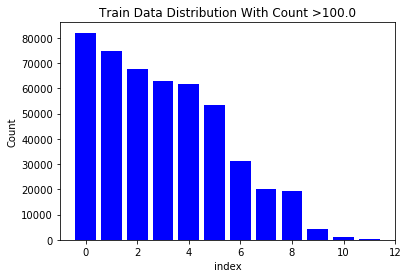

 Train Data Cnt 1 per 分位数 265.4  
 Train Data Cnt 10 per 分位数 1279.8 
 Train Data Cnt 50 per 分位数 42321.5 
 Train Data Cnt 90 per 分位数 73855.6 
 Train Data Cnt 99 per 分位数 81182.6
 训练集拥有分类数12.0 检验集拥有分类数12.0 共有有分类数12.0 
 训练集最多分类样本数82000.0 训练集最少分类样本数179.0 检验集新分类数样本数0.0


In [122]:
cat('user_star_level',100)  

18.context_timestamp 广告商品的展示时间，Long类型；取值是以秒为单位的Unix时间戳，以1天为单位对时间戳进行了偏移，要对时间戳进行转化

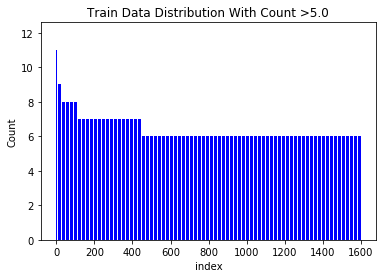

 Train Data Cnt 1 per 分位数 1.0  
 Train Data Cnt 10 per 分位数 1.0 
 Train Data Cnt 50 per 分位数 1.0 
 Train Data Cnt 90 per 分位数 3.0 
 Train Data Cnt 99 per 分位数 5.0
 训练集拥有分类数281815.0 检验集拥有分类数15592.0 共有有分类数297407.0 
 训练集最多分类样本数12.0 训练集最少分类样本数1.0 检验集新分类数样本数18371.0


In [126]:
cat('context_timestamp',5)  

In [128]:
data_train1['context_timestamp'].head(5)

0    1537236544
1    1537243232
2    1537211052
3    1537222670
4    1537271320
Name: context_timestamp, dtype: int64

In [132]:
import datetime
time=data_train1['context_timestamp'].map(lambda x :datetime.datetime.fromtimestamp(x))

In [134]:
time.head(5)

0   2018-09-18 10:09:04
1   2018-09-18 12:00:32
2   2018-09-18 03:04:12
3   2018-09-18 06:17:50
4   2018-09-18 19:48:40
Name: context_timestamp, dtype: datetime64[ns]

19.context_page_id 广告商品的展示页面编号，Int类型；取值从1开始，依次增加；在一次搜索的展示结果中第一屏的编号为1，第二屏的编号为2
,共20页

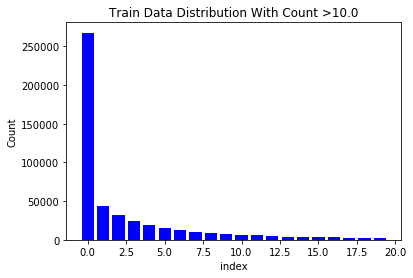

 Train Data Cnt 1 per 分位数 1997.4  
 Train Data Cnt 10 per 分位数 2505.7 
 Train Data Cnt 50 per 分位数 6921.0 
 Train Data Cnt 90 per 分位数 32681.4 
 Train Data Cnt 99 per 分位数 224956.0
 训练集拥有分类数20.0 检验集拥有分类数20.0 共有有分类数20.0 
 训练集最多分类样本数267462.0 训练集最少分类样本数1940.0 检验集新分类数样本数0.0


In [135]:
cat('context_page_id',10)  

20.predict_category_property   根据查询词预测的类目属性列表，String类型；
数据拼接格式为 “category_A:property_A_1,property_A_2,property_A_3;category_B:-1;category_C:property_C_1,property_C_2” ，
其中 category_A、category_B、category_C 是预测的三个类目；property_B 取值为-1，表示预测的第二个类目 category_B 没有对应的预测属性
表示没看懂，下面湿了也很乱不知道怎么弄

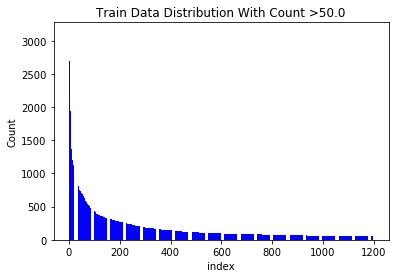

 Train Data Cnt 1 per 分位数 1.0  
 Train Data Cnt 10 per 分位数 1.0 
 Train Data Cnt 50 per 分位数 2.0 
 Train Data Cnt 90 per 分位数 7.0 
 Train Data Cnt 99 per 分位数 77.0
 训练集拥有分类数78793.0 检验集拥有分类数6964.0 共有有分类数82375.0 
 训练集最多分类样本数3120.0 训练集最少分类样本数1.0 检验集新分类数样本数6017.0


In [136]:
cat('predict_category_property',50)  

In [139]:
data_train1['predict_category_property'].head(5)

0    5799347067982556520:-1;509660095530134768:-1;5...
1    5799347067982556520:9172976955054793469;790838...
2    5799347067982556520:5131280576272319091;725801...
3    509660095530134768:-1;5799347067982556520:-1;7...
4    5799347067982556520:9172976955054793469;790838...
Name: predict_category_property, dtype: object

In [141]:
item_property_cnt=data_train1['predict_category_property'].map(lambda x : len(x.split(';')))
item_property_cnt.sort_values()

273218     1
428961     1
452984     1
155810     1
454494     1
430131     1
430132     1
269904     1
391986     1
251355     1
400714     1
148579     1
209721     1
22650      1
422784     1
454488     1
330172     1
449329     1
133339     1
235224     1
411624     1
153862     1
463633     1
224224     1
306248     1
28634      1
251341     1
131032     1
257847     1
164701     1
          ..
154290    12
413957    12
476800    12
437393    12
251061    12
134366    12
412687    12
174623    12
412686    12
445374    12
422905    12
384586    13
475090    13
60130     13
415843    13
260407    13
31998     13
19977     13
425520    13
31918     13
86117     13
448713    13
50178     13
397057    13
369809    13
252302    13
184937    13
203230    13
471311    13
295927    14
Name: predict_category_property, dtype: int64

In [142]:
data_test['predict_category_property'][0].split(';')

['8277336076276184272:-1',
 '5799347067982556520:-1',
 '509660095530134768:2636395404473730413',
 '7908382889764677758:-1']

In [143]:
data_test['predict_category_property'][1].split(';')

['5755694407684602296:216555019471416386,2636395404473730413',
 '8710739180200009128:-1',
 '7908382889764677758:216555019471416386,2636395404473730413',
 '9121432215720987772:-1',
 '8257512457089702259:-1',
 '8896700187874717254:-1']

太乱了搞不定！！！！！！！！！！！！！！！！！！！！！！！！！！！！

21.shop_review_num_level 店铺的评价数量等级，Int类型；取值从0开始，数值越大表示评价数量越多  25类

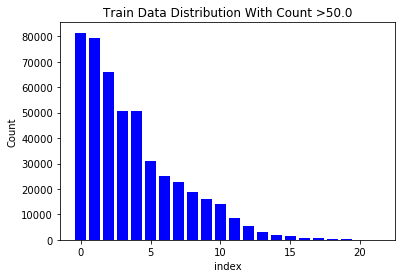

 Train Data Cnt 1 per 分位数 4.7  
 Train Data Cnt 10 per 分位数 44.0 
 Train Data Cnt 50 per 分位数 5484.0 
 Train Data Cnt 90 per 分位数 59857.8 
 Train Data Cnt 99 per 分位数 80913.4
 训练集拥有分类数25.0 检验集拥有分类数21.0 共有有分类数25.0 
 训练集最多分类样本数81426.0 训练集最少分类样本数4.0 检验集新分类数样本数0.0


In [146]:
cat('shop_review_num_level',50) 

22.shop_review_positive_rate 店铺的好评率，Double类型；取值在0到1之间，数值越大表示好评率越高，是个连续变量，直接入摸即可

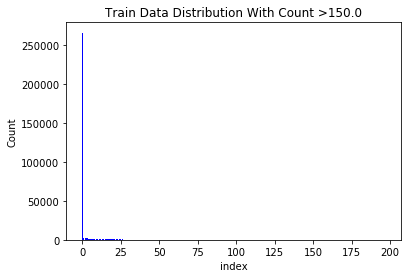

 Train Data Cnt 1 per 分位数 1.0  
 Train Data Cnt 10 per 分位数 1.0 
 Train Data Cnt 50 per 分位数 5.0 
 Train Data Cnt 90 per 分位数 40.0 
 Train Data Cnt 99 per 分位数 198.0
 训练集拥有分类数11825.0 检验集拥有分类数1302.0 共有有分类数13021.0 
 训练集最多分类样本数265908.0 训练集最少分类样本数1.0 检验集新分类数样本数7988.0


In [151]:
cat('shop_review_positive_rate',150) 

23.shop_star_level 店铺的星级编号，Int类型；取值从0开始，数值越大表示店铺的星级越高  共22个类

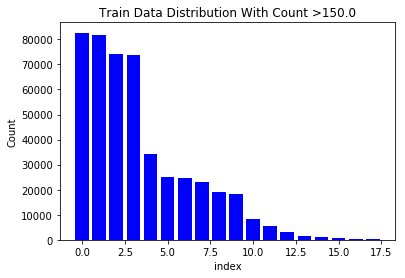

 Train Data Cnt 1 per 分位数 18.1  
 Train Data Cnt 10 per 分位数 71.1 
 Train Data Cnt 50 per 分位数 6990.0 
 Train Data Cnt 90 per 分位数 73943.9 
 Train Data Cnt 99 per 分位数 82417.9
 训练集拥有分类数22.0 检验集拥有分类数20.0 共有有分类数22.0 
 训练集最多分类样本数82639.0 训练集最少分类样本数7.0 检验集新分类数样本数0.0


In [154]:
cat('shop_star_level',150) 

24.shop_score_service 店铺的服务态度评分，Double类型；取值在0到1之间，数值越大表示评分越高 连续变量，入模即可

25.shop_score_delivery 店铺的物流服务评分，Double类型；取值在0到1之间，数值越大表示评分越高

26.shop_score_description 店铺的描述相符评分，Double类型；取值在0到1之间，数值越大表示评分越高